In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

In [2]:
# Définir le chemin vers les données prétraitées
DATA_DIR = "../../data2/processed"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VAL_DIR = os.path.join(DATA_DIR, "val")

# Paramètres
IMG_SIZE = (64, 64)
BATCH_SIZE = 32
NUM_CLASSES = 6  # On a 6 classes après avoir ignoré la classe "5"

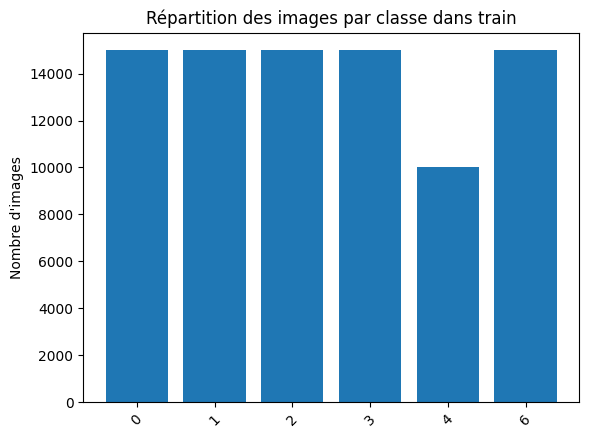

{'0': 15000, '1': 15000, '2': 15000, '3': 15000, '4': 10000, '6': 15000}


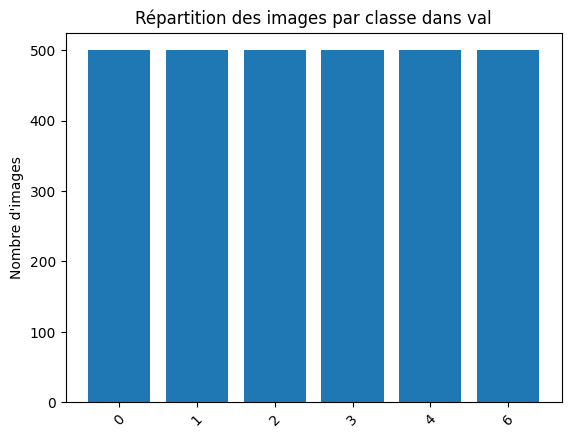

{'0': 500, '1': 500, '2': 500, '3': 500, '4': 500, '6': 500}


In [3]:
data_path = "../../data2/processed/train"
class_counts = {class_name: len(os.listdir(os.path.join(data_path, class_name))) for class_name in os.listdir(data_path)}

plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.ylabel("Nombre d'images")
plt.title("Répartition des images par classe dans train")
plt.show()

print(class_counts)

data_path = "../../data2/processed/val"
class_counts = {class_name: len(os.listdir(os.path.join(data_path, class_name))) for class_name in os.listdir(data_path)}

plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.ylabel("Nombre d'images")
plt.title("Répartition des images par classe dans val")
plt.show()

print(class_counts)

In [4]:
# Création des générateurs de données
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

CLASSES = ['0', '1', '2', '3', '4', '6']

train_generator = train_datagen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    classes=CLASSES,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    directory=VAL_DIR,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    classes=CLASSES,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 85000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


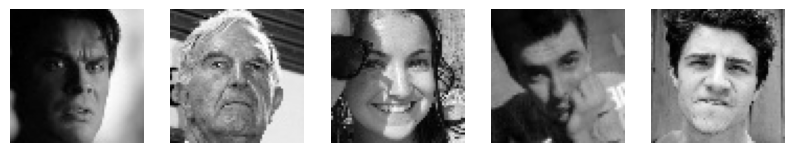

In [5]:
images, labels = next(train_generator)
plt.figure(figsize=(10, 5))
for i in range(5): 
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.show()


In [6]:
l2_lambda = 0.001
l2_lambda_dense = 0.002 

model = Sequential([
    InputLayer(input_shape=(64, 64, 1)),
    
    Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(l2_lambda_dense)),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Callbacks pour EarlyStopping et réduction du learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)

# Entraînement du modèle
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
2657/2657 [==============================] - 56s 19ms/step - loss: 2.6482 - accuracy: 0.2382 - val_loss: 1.8351 - val_accuracy: 0.3547 - lr: 0.0010
Epoch 2/50
2657/2657 [==============================] - 30s 11ms/step - loss: 1.7762 - accuracy: 0.3654 - val_loss: 1.9524 - val_accuracy: 0.3440 - lr: 0.0010
Epoch 3/50
2657/2657 [==============================] - 25s 10ms/step - loss: 1.7020 - accuracy: 0.4264 - val_loss: 1.8778 - val_accuracy: 0.3907 - lr: 0.0010
Epoch 4/50
2657/2657 [==============================] - 25s 10ms/step - loss: 1.6418 - accuracy: 0.4657 - val_loss: 1.7779 - val_accuracy: 0.4050 - lr: 0.0010
Epoch 5/50
2657/2657 [==============================] - 26s 10ms/step - loss: 1.5763 - accuracy: 0.5029 - val_loss: 1.5293 - val_accuracy: 0.5117 - lr: 0.0010
Epoch 6/50
2657/2657 [==============================] - 25s 10ms/step - loss: 1.5282 - accuracy: 0.5240 - val_loss: 1.4900 - val_accuracy: 0.5233 - lr: 0.0010
Epoch 7/50
2657/2657 [========================

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

94/94 [==============================] - 1s 8ms/step - loss: 1.0858 - accuracy: 0.6200
Test Accuracy: 0.62


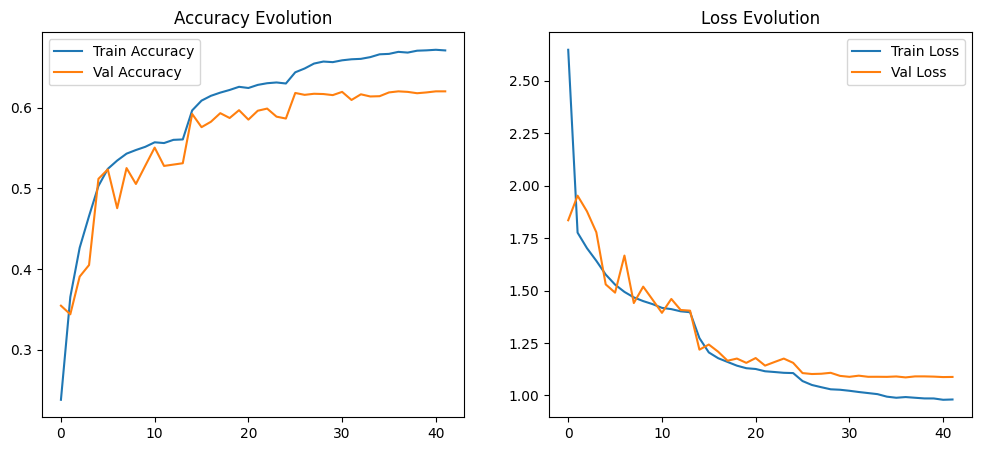

In [9]:
# 🔹 Évaluation
test_loss, test_acc = model.evaluate(val_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# 🔹 Courbes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Evolution')

plt.show()

1/1 [==============================] - 0s 75ms/step


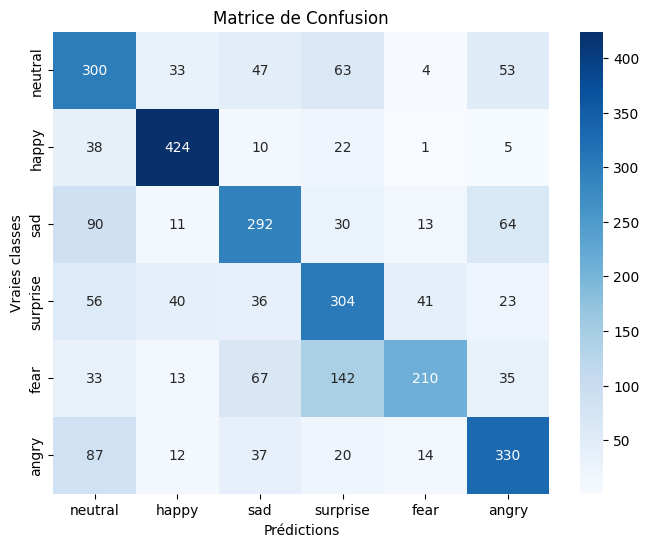

Classification Report:
              precision    recall  f1-score   support

     neutral       0.50      0.60      0.54       500
       happy       0.80      0.85      0.82       500
         sad       0.60      0.58      0.59       500
    surprise       0.52      0.61      0.56       500
        fear       0.74      0.42      0.54       500
       angry       0.65      0.66      0.65       500

    accuracy                           0.62      3000
   macro avg       0.63      0.62      0.62      3000
weighted avg       0.63      0.62      0.62      3000



In [10]:

# Récupérer les vraies étiquettes et prédictions
y_true = []
y_pred = []

for batch in val_generator:
    X_batch, y_batch = batch
    y_true.extend(np.argmax(y_batch, axis=1))  # Labels réels
    y_pred.extend(np.argmax(model.predict(X_batch), axis=1))  # Prédictions

    if len(y_true) >= val_generator.samples:
        break  # Stopper quand on a toutes les prédictions

# Obtenir les noms des classes
class_labels = list(val_generator.class_indices.keys())
label_names = ["neutral", "happy", "sad", "surprise", "fear", "angry"]

# 🔹 Générer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# 🔹 Affichage avec seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()



# 🔹 Rapport détaillé des performances
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_names))

In [ ]:
model.save("scratch_d2_62_nb.h5")

NameError: name 'model' is not defined

: 